# New Section

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

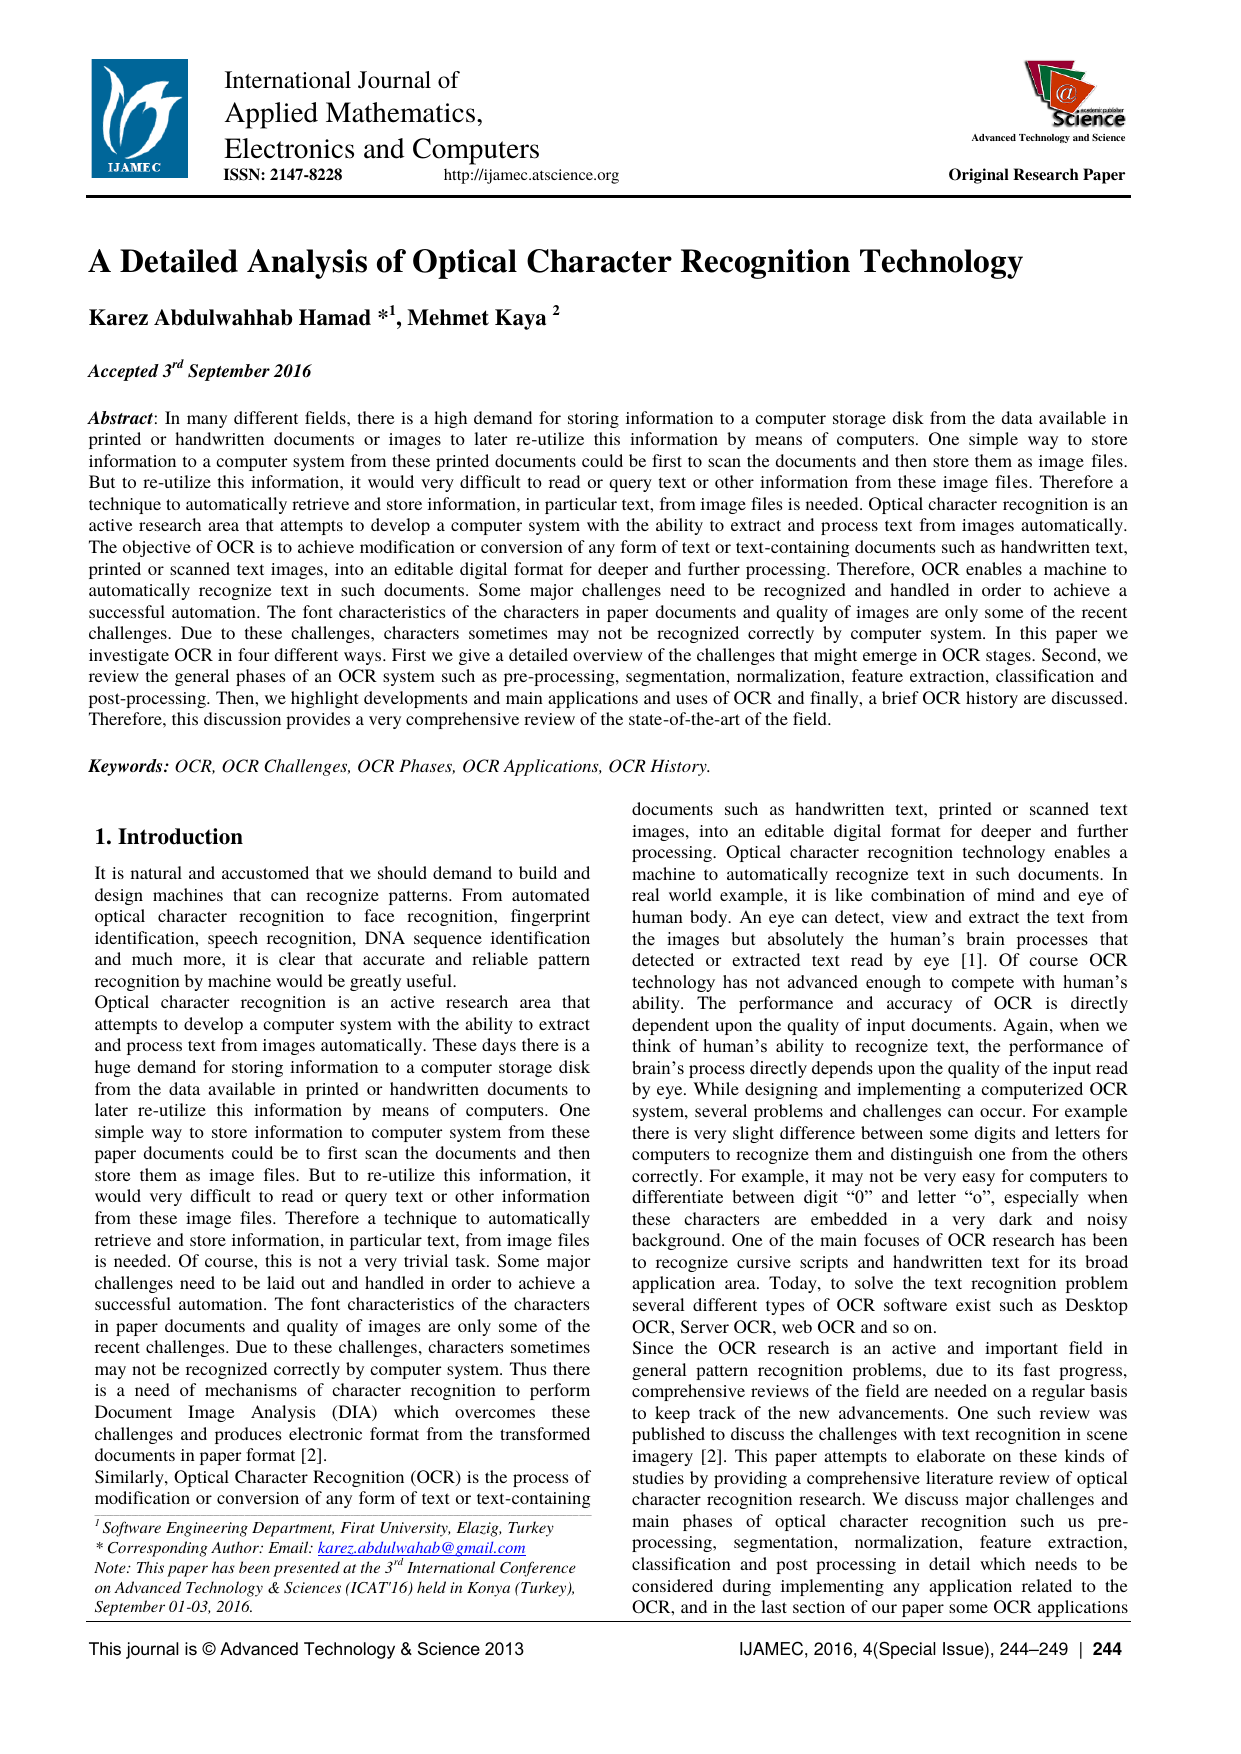

In [ ]:
img = cv2.imread('1.png')
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,582 kB/s)
debconf: unable to initi

In [ ]:
import pytesseract

In [ ]:
text = pytesseract.image_to_string(img)
print(text)

International Journal of
Applied Mathematics,

Electronics and Computers
ISSN: 2147-8228 http://ijamec.ats

Advanced Technology and Seience

pera

  

ience.org Original Research Paper

A Detailed Analysis of Optical Character Recognition Technology
Karez Abdulwahhab Hamad *', Mehmet Kaya ”

Accepted 3" September 2016

Abstract: In many different fields, there is a high demand for storing information to a computer storage disk from the data available in
printed or handwritten documents or images to later re-utilize this information by means of computers. One simple way to store
information to a computer system from these printed documents could be first to scan the documents and then store them as image files.
But to re-utilize this information, it would very difficult to read or query text or other information from these image files. Therefore a
technique to automatically retrieve and store information, in particular text, from image files is needed. Optical character recognition is a

In [ ]:
H,W,_ = img.shape
print(H,W,img.shape)

img_boxes = pytesseract.image_to_data(img)
print(img_boxes)

1754 1241 (1754, 1241, 3)
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1241	1754	-1	
2	1	1	0	0	0	225	71	257	57	-1	
3	1	1	1	0	0	225	71	257	57	-1	
4	1	1	1	1	0	225	71	235	17	-1	
5	1	1	1	1	1	225	71	126	17	96	International
5	1	1	1	1	2	358	71	73	17	96	Journal
5	1	1	1	1	3	438	71	22	17	96	of
4	1	1	1	2	0	225	102	257	26	-1	
5	1	1	1	2	1	225	102	93	26	96	Applied
5	1	1	1	2	2	326	102	156	24	96	Mathematics,
2	1	2	0	0	0	224	138	323	46	-1	
3	1	2	1	0	0	224	138	323	46	-1	
4	1	2	1	1	0	225	138	314	26	-1	
5	1	2	1	1	1	225	138	129	20	96	Electronics
5	1	2	1	1	2	364	138	40	20	96	and
5	1	2	1	1	3	413	138	126	26	96	Computers
4	1	2	1	2	0	224	168	323	16	-1	
5	1	2	1	2	1	224	168	24	12	96	ISSN:
5	1	2	1	2	2	270	168	72	12	80	2147-8228
5	1	2	1	2	3	444	169	103	15	36	http://ijamec.ats
2	1	3	0	0	0	972	134	153	9	-1	
3	1	3	1	0	0	972	134	153	9	-1	
4	1	3	1	1	0	972	134	153	9	-1	
5	1	3	1	1	1	972	134	44	7	71	Advanced
5	1	3	1	1	2	1019	134	50	9	95	Technology
5	1	3	1	1	3	1073	134	1

In [ ]:
Dict = {}
for i,box in enumerate(img_boxes.splitlines()):
    if i != 0:
        box = box.split()
        if len(box) == 12:
            # print(box[-1])
            x,y,w,h = int(box[6]),int(box[7]),int(box[8]),int(box[9])
            # cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)
            # cv2.putText(img,box[-1],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255),1)
            box[-1] = box[-1].lower()
            if box[-1] in Dict:
                Dict[box[-1]].append([x,y,(x+w),(y+h)])
            else:
                Dict[box[-1]] = [[x,y,(x+w),(y+h)]]

Do you want to search any word?(Y/N) : Y

Enter the word or words : a
a : 23 results found


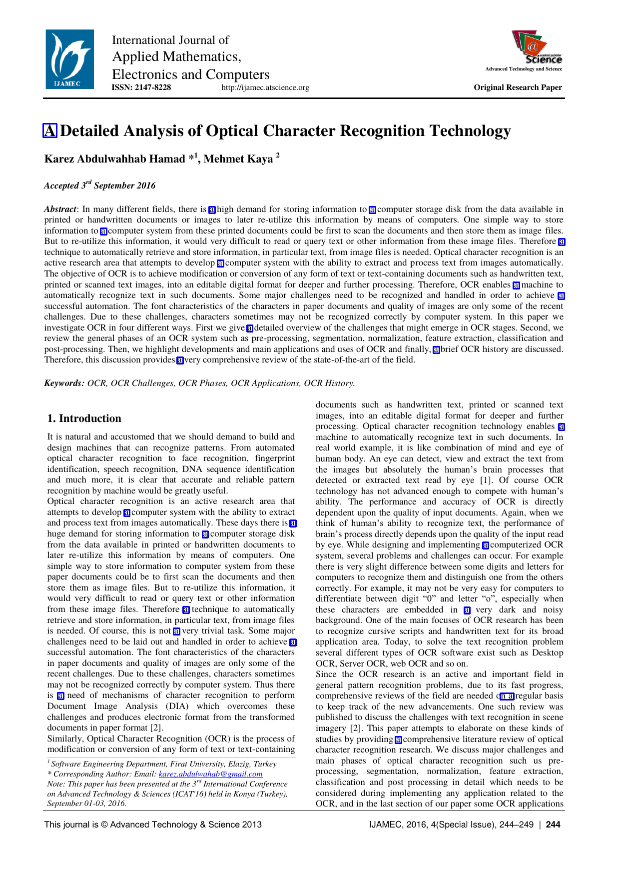


Do you want to search any word?(Y/N) : Y

Enter the word or words : Vishal is a bad boy
vishal : No results
is : 17 results found


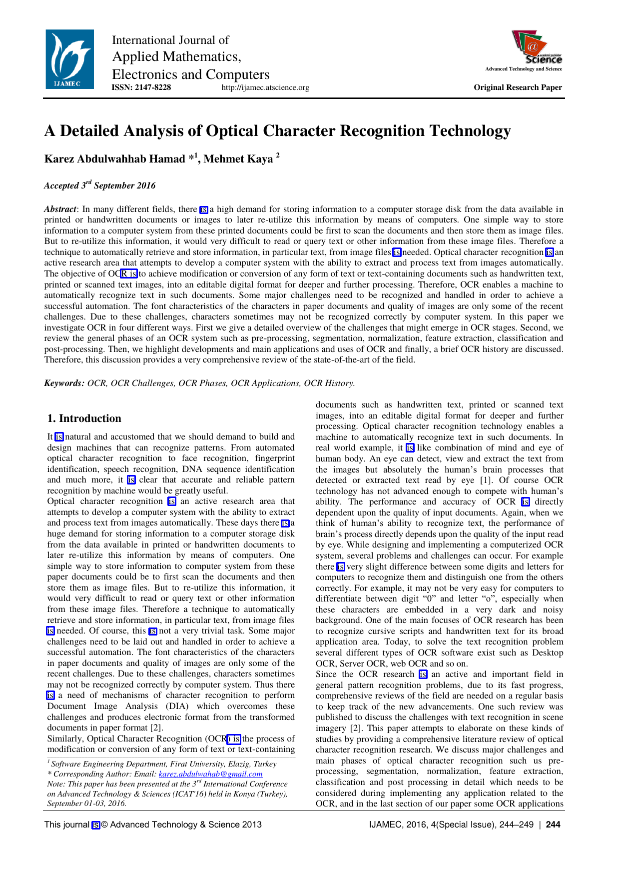

a : 23 results found


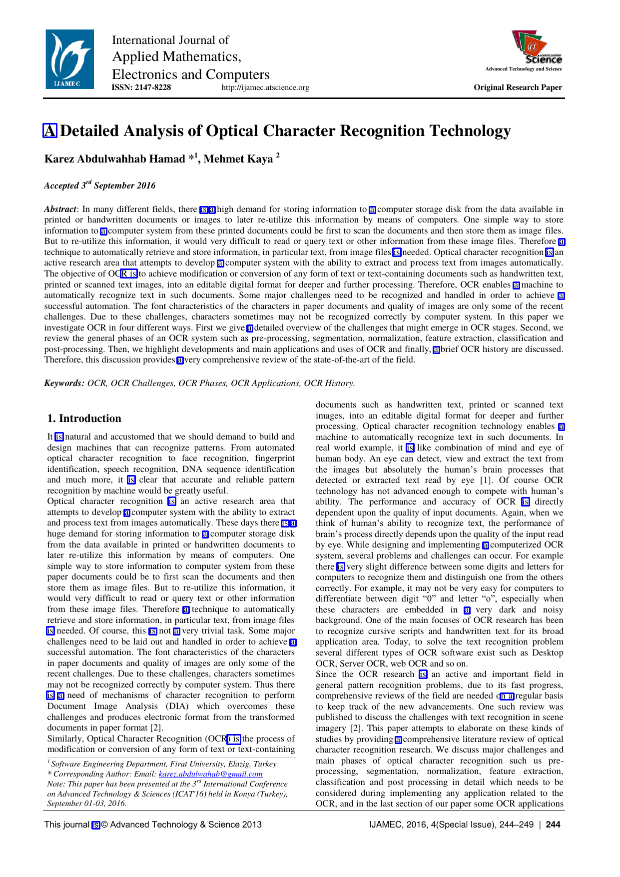

bad : No results
boy : No results

Do you want to search any word?(Y/N) : j
Invalid


In [ ]:
Q = input('Do you want to search any word?(Y/N) : ')
if Q == 'Y':
    print()
if Q == 'Y':
    while Q == 'Y':
        result = img.copy()
        word = input('Enter the word or words : ')
        word_ = word.lower()
        word_ = word_.split(' ')
        for word in word_:
            if word not in Dict:
                print(word,': No results')
            else:
                if len(Dict[word]) == 1:
                    print(word,':',str(len(Dict[word])),'result found')
                else:
                    print(word,':',str(len(Dict[word])),'results found')
                for b in Dict[word]:
                    x,y,x1,y1 = b
                    cv2.rectangle(result, (x-2,y-2), (x1+2, y1+2), (255, 0, 0), 2)
                imS = cv2.resize(result, (W//2, H//2))
                cv2_imshow(imS)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
        print()
        Q = input('Do you want to search any word?(Y/N) : ')
        if Q == 'Y':
            print()
        
if Q != 'Y' and Q != 'N':
    print('Invalid')